# Predicting Students' Performance Based On Available Variables

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR

In [2]:
# Loading datasets

train = pd.read_csv('StudentPerformanceTrainingSet.csv')
test = pd.read_csv('StudentPerformanceTestSet.csv')

# Exploratory Data Analysis

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   student_id                      1200 non-null   int64 
 1   gender                          1161 non-null   object
 2   race/ethnicity                  1117 non-null   object
 3   parental level of education     1050 non-null   object
 4   lunch                           1038 non-null   object
 5   test preparation course         1147 non-null   object
 6   score                           1200 non-null   int64 
 7   parental_job_status             1178 non-null   object
 8   parental_wealth_classification  1159 non-null   object
dtypes: int64(2), object(7)
memory usage: 84.5+ KB


In [4]:
train.describe()

,student_id,score
count,1200.000000,1200.000000
mean,1013.711667,62.272500
std,566.800153,14.108122
min,1.000000,14.000000
25%,526.750000,53.000000
50%,1020.500000,63.000000
75%,1487.250000,73.000000
max,2000.000000,94.000000


In [5]:
print("Train data shape: ", train.shape)
print("Test data shape: ", test.shape)

Train data shape:  (1200, 9)
Test data shape:  (800, 8)


In [6]:
# Reading Dataset

train.head()

,student_id,gender,race/ethnicity,parental level of education,lunch,test preparation course,score,parental_job_status,parental_wealth_classification
0,1014,female,group D,high school,standard,completed,88,employed,poor
1,1650,female,NaN,some high school,free/reduced,completed,34,unemployed,middle class
2,717,female,group C,some high school,standard,none,59,employed,middle class
3,258,female,group D,NaN,standard,none,68,employed,poor
4,1312,male,group D,some college,standard,completed,74,employed,poor


In [7]:
#Data cleaning

train =train.dropna()
train.head()

,student_id,gender,race/ethnicity,parental level of education,lunch,test preparation course,score,parental_job_status,parental_wealth_classification
0,1014,female,group D,high school,standard,completed,88,employed,poor
2,717,female,group C,some high school,standard,none,59,employed,middle class
4,1312,male,group D,some college,standard,completed,74,employed,poor
5,1385,male,group C,associate's degree,free/reduced,none,55,employed,middle class
6,988,male,group C,some high school,free/reduced,none,74,employed,poor


In [8]:
import matplotlib.pyplot as plt
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize']=(12,6)

In [9]:
train.score.describe()

count    760.000000
mean      62.200000
std       14.043674
min       14.000000
25%       52.750000
50%       62.000000
75%       72.000000
max       94.000000
Name: score, dtype: float64

Skew is:  -0.12608587000614996


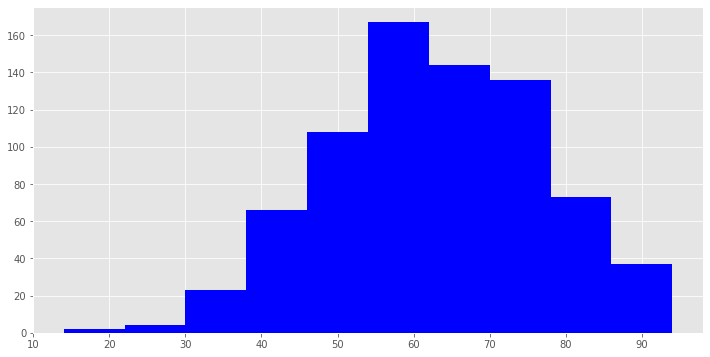

In [10]:
print("Skew is: ", train.score.skew())
plt.hist(train.score, color='blue')
plt.show()

In [11]:
train['parental level of education'].unique()

array(['high school', 'some high school', 'some college',
       "associate's degree", "master's degree", "bachelor's degree"],
      dtype=object)

In [12]:
train['parental_job_status'].unique()

array(['employed', 'unemployed'], dtype=object)

In [13]:
train['parental_wealth_classification'].unique()

array(['poor', 'middle class', 'wealthy'], dtype=object)

In [14]:
train['test preparation course'].unique()

array(['completed', 'none'], dtype=object)

In [15]:
# Feature Engineering on these columns

train['edu'] = train['parental level of education'].map({"some high school":0, "high school":1, "some college":2, "associate's degree":3,
                                                         "bachelor's degree":4, "master's degree":5})
test['edu'] = test['parental level of education'].map({"some high school":0, "high school":1, "some college":2, "associate's degree":3,
                                                         "bachelor's degree":4, "master's degree":5})

train['job'] = train['parental_job_status'].map({'unemployed':0, 'employed':1})
test['job'] = test['parental_job_status'].map({'unemployed':0, 'employed':1})

train['wealth'] = train['parental_wealth_classification'].map({'poor':0, 'middle class':1, 'wealthy':2})
test['wealth'] = test['parental_wealth_classification'].map({'poor':0, 'middle class':1, 'wealthy':2})

train['course'] = train['test preparation course'].map({'none':0, 'completed':1})
test['course'] = test['test preparation course'].map({'none':0, 'completed':1})

train.drop(train[['race/ethnicity','lunch','parental level of education',  'parental_job_status']], axis='columns', inplace=True)
test.drop(test[['race/ethnicity','lunch','parental level of education',  'parental_job_status']], axis='columns', inplace=True)
train.head()

,student_id,gender,test preparation course,score,parental_wealth_classification,edu,job,wealth,course
0,1014,female,completed,88,poor,1,1,0,1
2,717,female,none,59,middle class,0,1,1,0
4,1312,male,completed,74,poor,2,1,0,1
5,1385,male,none,55,middle class,3,1,1,0
6,988,male,none,74,poor,0,1,0,0


In [16]:
print(train['edu'].unique())
print(train['job'].unique())
print(train['wealth'].unique())
print(train['course'].unique())

[1 0 2 3 5 4]
[1 0]
[0 1 2]
[1 0]


# Data Visualization

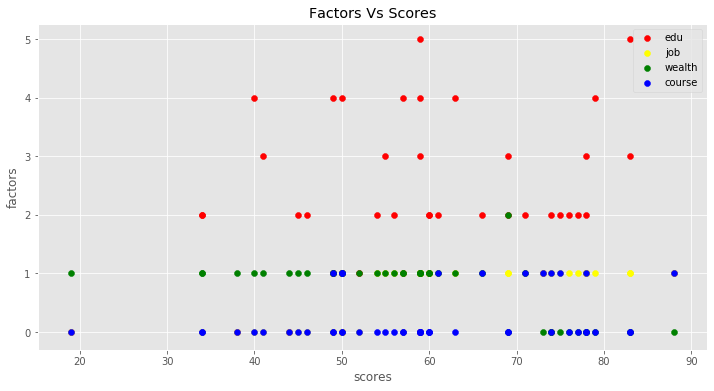

In [17]:
plt.scatter(train.score[:50], train.edu[:50], color='red', label='edu')
plt.scatter(train.score[:50], train.job[:50], color='yellow', label='job')
plt.scatter(train.score[:50], train.wealth[:50], color='green', label='wealth')
plt.scatter(train.score[:50], train.course[:50], color='blue', label='course')

plt.xlabel("scores")
plt.ylabel("factors")
plt.title("Factors Vs Scores")
plt.legend()

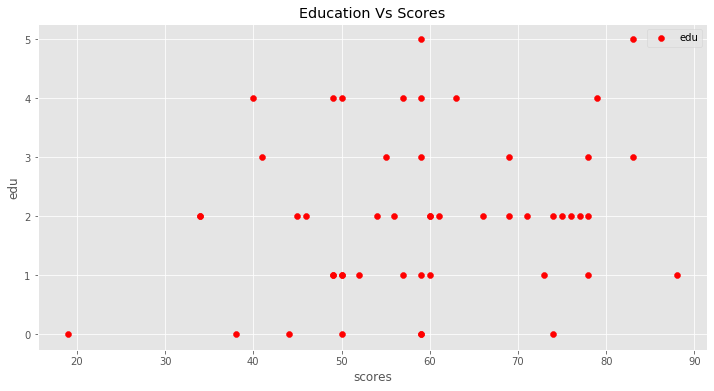

In [18]:
plt.scatter(train.score[:50], train.edu[:50], color='red', label='edu')
plt.xlabel("scores")
plt.ylabel("edu")
plt.title("Education Vs Scores")
plt.legend()

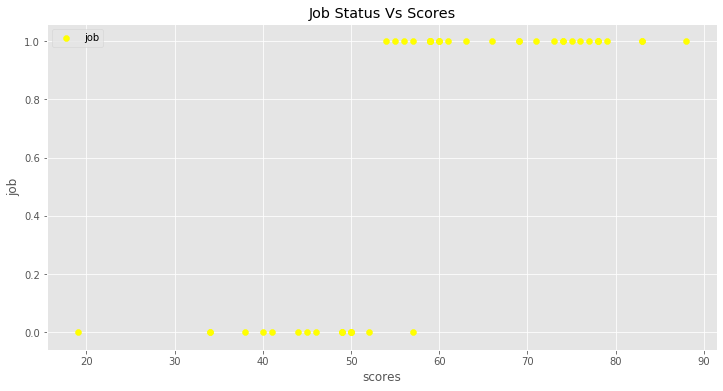

In [19]:
plt.scatter(train.score[:50], train.job[:50], color='yellow', label='job')
plt.xlabel("scores")
plt.ylabel("job")
plt.title("Job Status Vs Scores")
plt.legend()

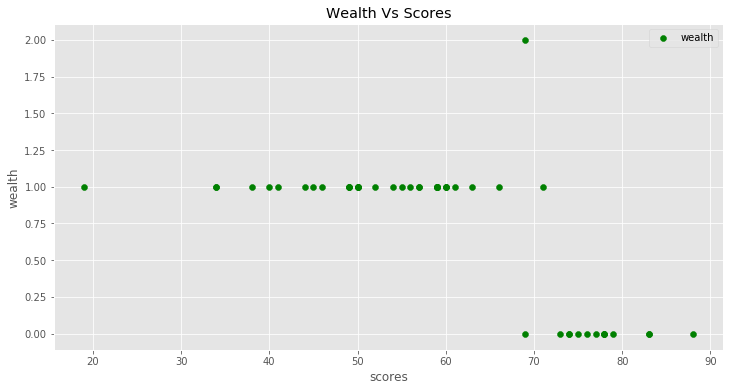

In [20]:
plt.scatter(train.score[:50], train.wealth[:50], color='green', label='wealth')
plt.xlabel("scores")
plt.ylabel("wealth")
plt.title("Wealth Vs Scores")
plt.legend()

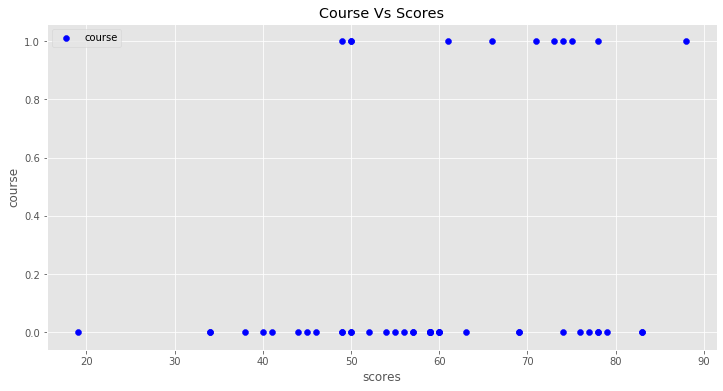

In [21]:
plt.scatter(train.score[:50], train.course[:50], color='blue', label='course')
plt.xlabel("scores")
plt.ylabel("course")
plt.title("Course Vs Scores")
plt.legend()

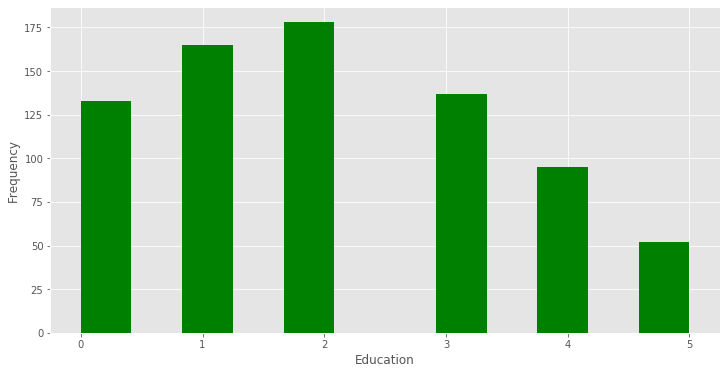

In [22]:
plt.hist(train.edu, bins=12, color='green')
plt.xlabel("Education")
plt.ylabel("Frequency")
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000013A201FF688>,
      dtype=object)

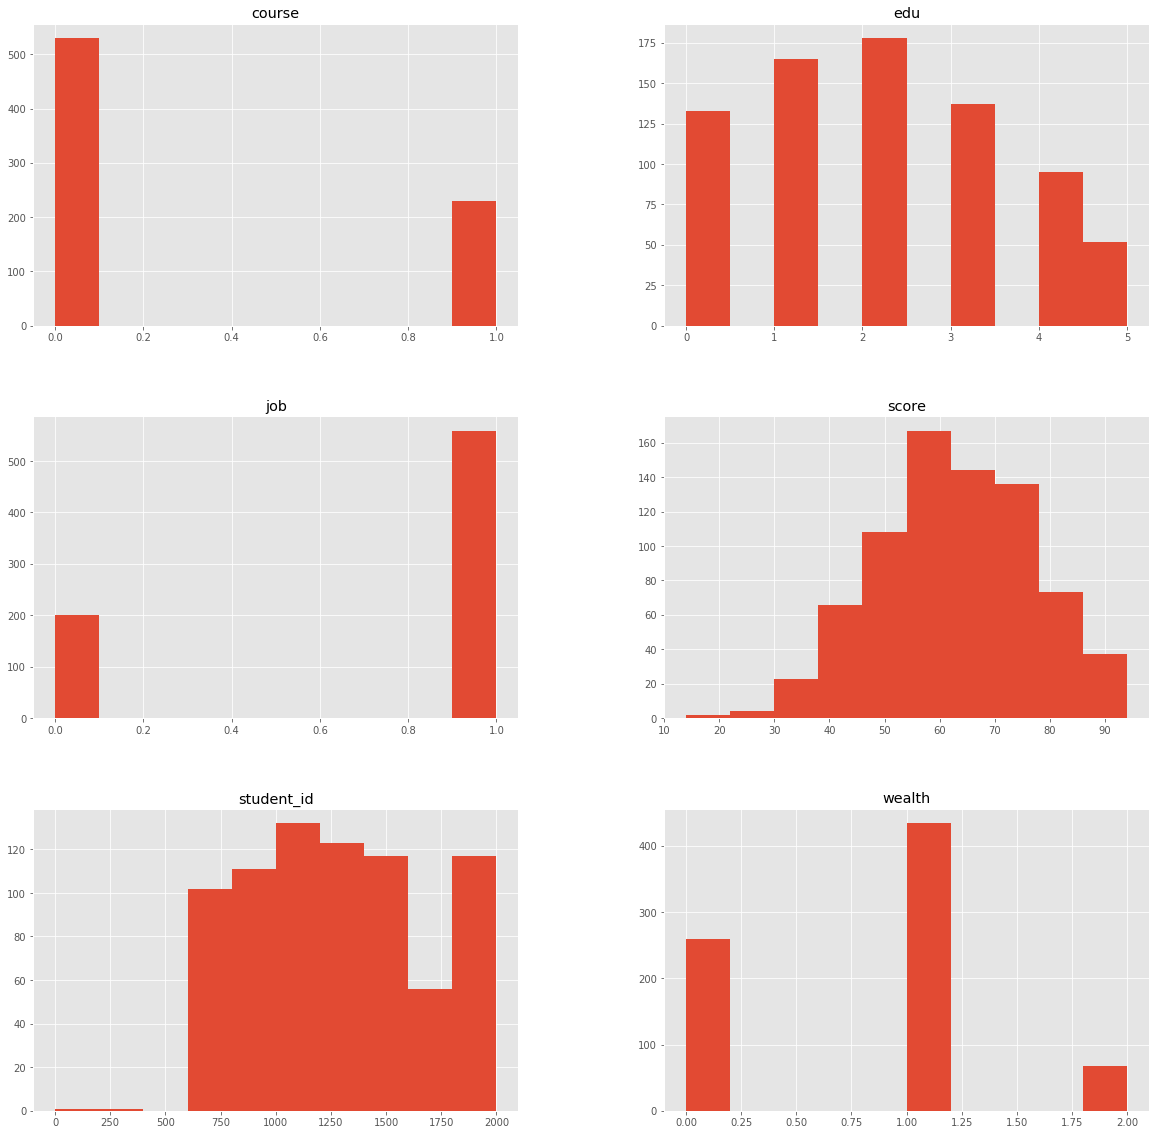

In [23]:
train.hist(figsize=(20,20))

<Figure size 1440x864 with 0 Axes>

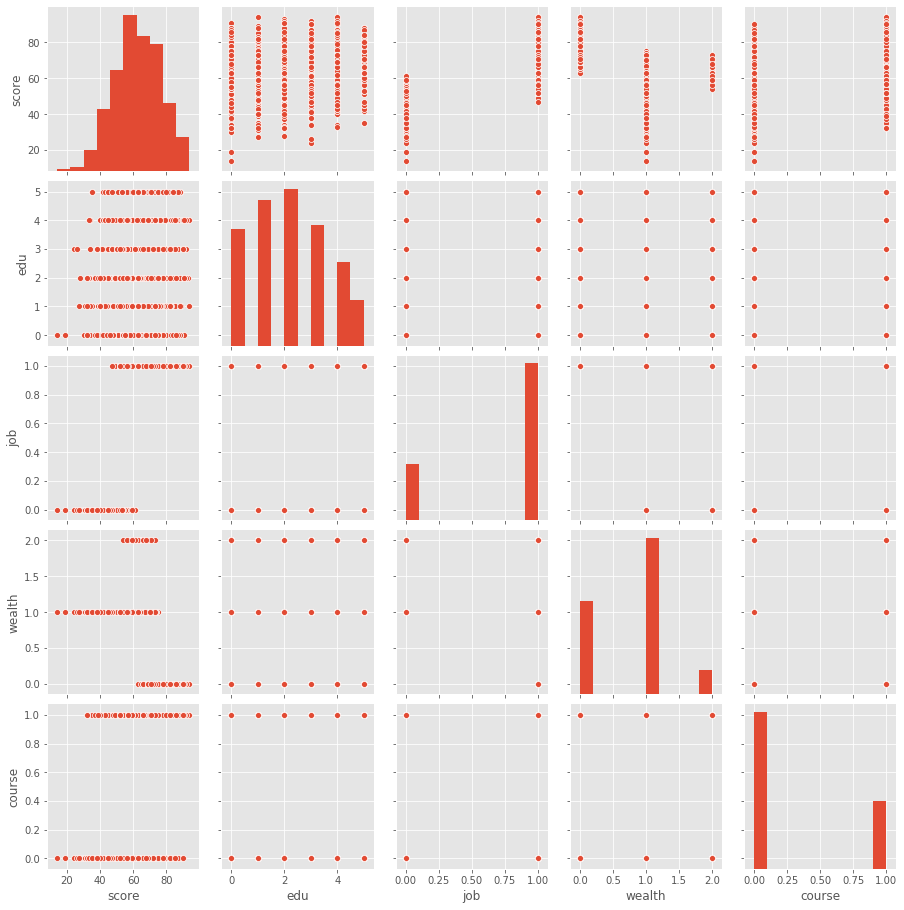

In [24]:
plt.figure(figsize=(20, 12))
sns.pairplot(train[['gender','score','edu','job','wealth','course']])

In [25]:
gender =train['gender'].value_counts()
gender

male      384
female    376
Name: gender, dtype: int64

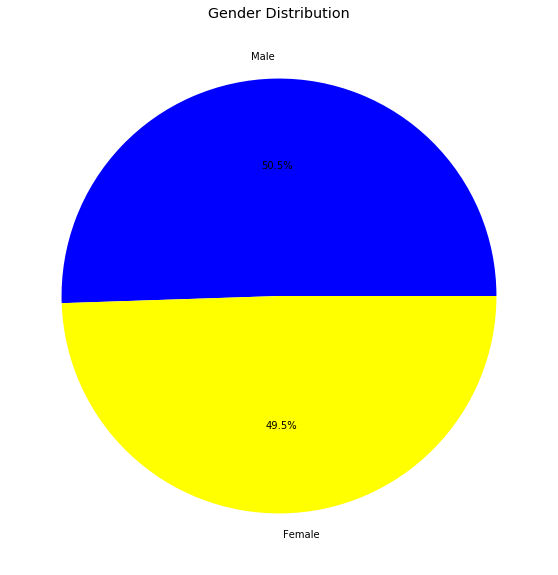

In [26]:
plt.figure(figsize=(18, 10))
color=('blue', 'yellow')
plt.pie(gender, data=train, labels=("Male", "Female"), colors=color, autopct="%1.1f%%")

plt.title("Gender Distribution", loc='center')
plt.show()

In [27]:
prep = train['test preparation course'].value_counts()
prep

none         530
completed    230
Name: test preparation course, dtype: int64

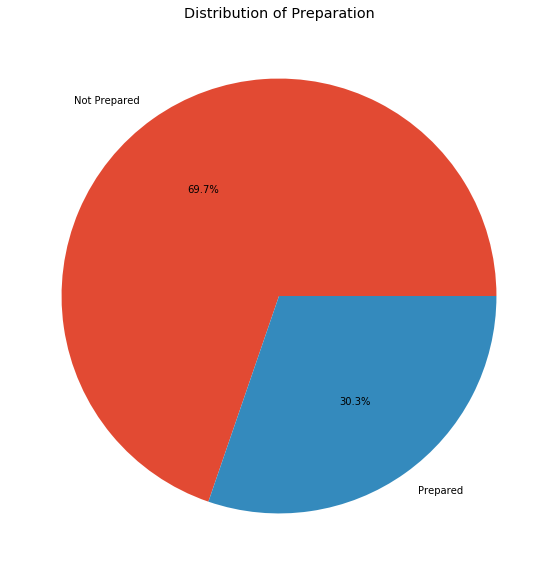

In [28]:
plt.figure(figsize=(18, 10))
plt.pie(prep, data=train, labels=("Not Prepared", "Prepared"), autopct="%1.1f%%")

plt.title("Distribution of Preparation", loc='center')
plt.show()

In [29]:
wealth_status = train['parental_wealth_classification'].value_counts()
wealth_status

middle class    434
poor            259
wealthy          67
Name: parental_wealth_classification, dtype: int64

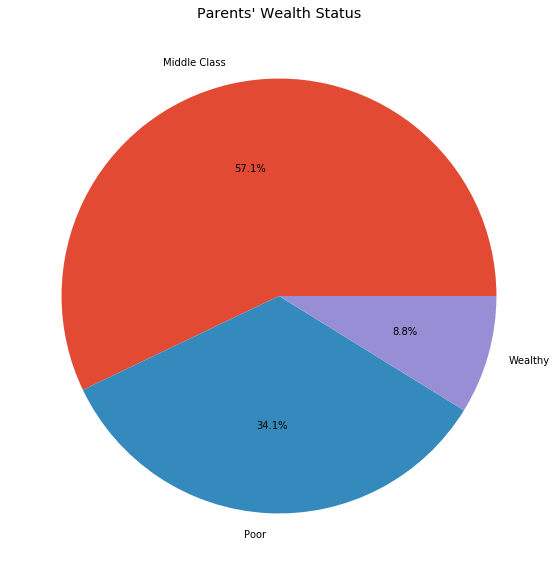

In [30]:
plt.figure(figsize=(18, 10))
plt.pie(wealth_status, data=train, labels=("Middle Class", "Poor", "Wealthy"), autopct="%1.1f%%")

plt.title("Parents' Wealth Status", loc='center')
plt.show()

# Feature Engineering

In [31]:
# Splitting Data

X = train[['edu', 'job', 'wealth', 'course']]
y = train['score']

X.head()

,edu,job,wealth,course
0,1,1,0,1
2,0,1,1,0
4,2,1,0,1
5,3,1,1,0
6,0,1,0,0


In [32]:
y.head()

0    88
2    59
4    74
5    55
6    74
Name: score, dtype: int64

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Building Models

## Try different models and pick the optimal

In [34]:
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

tree.score(X_test, y_test)

0.7947164099359273

In [35]:
rbf = SVR(kernel='rbf',C=1e3, gamma=0.1)
rbf.fit(X_train, y_train)

rbf.score(X_test, y_test)

0.7888056367646565

### Decision Tree Regressor had a higher score so we adopt its model

In [36]:
# Predicting the test values

prediction = tree.predict(X_test)
prediction

array([63.75      , 77.        , 77.        , 80.47058824, 80.07692308,
       42.72222222, 61.        , 63.5       , 42.13636364, 77.        ,
       79.27272727, 75.66666667, 42.13636364, 80.47058824, 42.72222222,
       74.96      , 42.13636364, 74.96      , 43.61111111, 45.92307692,
       75.29411765, 61.        , 60.51612903, 80.47058824, 43.61111111,
       59.38888889, 77.        , 62.33333333, 59.625     , 75.29411765,
       43.5       , 77.        , 59.625     , 59.38888889, 79.27272727,
       44.67741935, 62.        , 79.27272727, 77.        , 74.31034483,
       75.05882353, 74.96      , 62.33333333, 62.        , 44.67741935,
       42.72222222, 62.33333333, 43.61111111, 42.72222222, 60.55555556,
       60.51612903, 59.9       , 75.66666667, 75.05882353, 62.33333333,
       74.96      , 74.31034483, 63.5       , 43.61111111, 45.92307692,
       80.47058824, 60.55555556, 42.72222222, 60.55555556, 77.        ,
       45.92307692, 59.625     , 79.27272727, 44.67741935, 74.31

In [37]:
# Merging model into our test dataset

finalz = pd.DataFrame()
finalz['student_id'] = test.student_id

In [38]:
# Feature variables in our test dataset

feats= test.select_dtypes(include=[np.number]).drop(['student_id'], axis=1).interpolate()
feats.head()

,edu,job,wealth,course
0,2.0,1.0,1.0,0.0
1,3.0,1.0,0.0,0.0
2,0.0,1.0,1.0,0.0
3,1.5,1.0,2.0,0.0
4,3.0,1.0,0.0,1.0


## Feature Engineering on our test dataset

In [39]:
feats.edu.median()

2.0

In [40]:
# Replacing 'na' values which are '-1' to median score

feats['edu'].replace(-1, 1, inplace=True)
feats.edu.head()

0    2.0
1    3.0
2    0.0
3    1.5
4    3.0
Name: edu, dtype: float64

In [41]:

feats.job.median()

feats['job'].replace(-1, 0, inplace=True)

feats.wealth.median()

feats['wealth'].replace(-1, 0, inplace=True)

feats.course.median()

feats['course'].replace(-1, 0, inplace=True)

feats.head()

,edu,job,wealth,course
0,2.0,1.0,1.0,0.0
1,3.0,1.0,0.0,0.0
2,0.0,1.0,1.0,0.0
3,1.5,1.0,2.0,0.0
4,3.0,1.0,0.0,1.0


In [42]:
# Prediction on test dataset

predictions = tree.predict(feats)
predictions

array([59.625     , 74.96      , 59.38888889, 63.75      , 77.55      ,
       79.27272727, 77.        , 77.        , 62.33333333, 63.5       ,
       80.47058824, 74.31034483, 59.625     , 75.05882353, 44.67741935,
       75.66666667, 42.13636364, 59.38888889, 42.72222222, 75.29411765,
       42.72222222, 42.72222222, 58.16666667, 43.5       , 74.31034483,
       43.5       , 44.67741935, 74.96      , 63.14285714, 59.625     ,
       74.31034483, 74.31034483, 60.55555556, 75.05882353, 75.05882353,
       77.55      , 77.        , 77.55      , 75.05882353, 75.66666667,
       43.61111111, 58.16666667, 59.76923077, 74.31034483, 75.29411765,
       75.66666667, 42.72222222, 59.76923077, 78.71428571, 58.16666667,
       74.96      , 64.83333333, 61.        , 60.55555556, 56.        ,
       59.9       , 46.83333333, 60.55555556, 44.67741935, 80.47058824,
       77.55      , 64.83333333, 75.66666667, 74.96      , 59.9       ,
       75.66666667, 42.72222222, 46.83333333, 75.05882353, 60.55

In [43]:
# Rounding up the predictions to whole numbers

predictions = predictions.round()
predictions

array([60., 75., 59., 64., 78., 79., 77., 77., 62., 64., 80., 74., 60.,
       75., 45., 76., 42., 59., 43., 75., 43., 43., 58., 44., 74., 44.,
       45., 75., 63., 60., 74., 74., 61., 75., 75., 78., 77., 78., 75.,
       76., 44., 58., 60., 74., 75., 76., 43., 60., 79., 58., 75., 65.,
       61., 61., 56., 60., 47., 61., 45., 80., 78., 65., 76., 75., 60.,
       76., 43., 47., 75., 61., 64., 74., 67., 61., 77., 60., 58., 46.,
       44., 43., 44., 79., 44., 64., 75., 64., 45., 77., 61., 44., 76.,
       79., 80., 75., 80., 60., 60., 75., 42., 61., 60., 80., 79., 74.,
       59., 78., 61., 64., 63., 61., 47., 45., 60., 75., 79., 62., 61.,
       60., 43., 45., 47., 80., 80., 44., 43., 58., 47., 44., 77., 64.,
       77., 75., 63., 59., 62., 75., 64., 78., 58., 60., 64., 61., 75.,
       60., 58., 78., 77., 42., 75., 44., 46., 63., 43., 43., 59., 42.,
       61., 80., 74., 44., 78., 80., 80., 45., 75., 44., 80., 62., 44.,
       43., 80., 64., 63., 77., 44., 61., 45., 80., 78., 61., 80

In [44]:
# Creating cleaned columns for our test dataset

finalz['edu'] = feats['edu']
finalz['job'] = feats['job']
finalz['wealth'] = feats['wealth']
finalz['course'] = feats['course']
finalz['score'] = predictions
finalz.head()

,student_id,edu,job,wealth,course,score
0,810,2.0,1.0,1.0,0.0,60.0
1,1609,3.0,1.0,0.0,0.0,75.0
2,15,0.0,1.0,1.0,0.0,59.0
3,134,1.5,1.0,2.0,0.0,64.0
4,846,3.0,1.0,0.0,1.0,78.0


In [45]:
# Exporting new test dataset as csv

finalz.to_csv('students.csv', index=False)